In [1]:
import math
from tensorboardX import SummaryWriter


In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
from networks import dqn_network

4
WARN: <class 'wrappers.AtariResetLive'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.
done


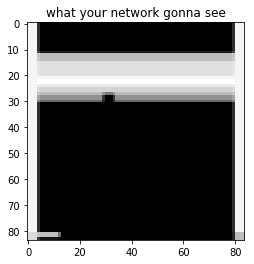

In [3]:
from wrappers import make_env
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name = "BreakoutDeterministic-v4"
env = make_env(env_name)
#env = gym.make('BreakoutDeterministic-v4')
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[0,:,:],interpolation='none',cmap='gray');

In [4]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

dqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 10,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DQN',
    'IS_DDQN' : False
    }
ddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 10,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDQN',
    'IS_DDQN' : True
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [5]:
env.reset()
agent.train()

0
0.0
22.0
500
0.0
22.0
1000
0.0
22.0
1500
0.333333333333
31.3333333333
2000
0.0
22.0
2500
0.0
22.0
3000
0.666666666667
40.6666666667
3500
0.0
22.0
4000
1.0
50.0
4500
0.0
22.0
5000
0.0
22.0
5500
0.666666666667
40.6666666667
6000
0.333333333333
31.3333333333
6500
1.0
69.3333333333
7000
0.666666666667
46.6666666667
7500
0.666666666667
40.6666666667
8000
0.333333333333
31.3333333333
8500
1.0
56.3333333333
9000
0.666666666667
40.6666666667
9500
1.0
50.0
10000
1.0
63.0
10500
1.66666666667
87.3333333333
11000
1.0
57.0
11500
1.0
57.0
12000
0.666666666667
55.0
12500
1.0
57.0
13000
2.0
94.0
13500
1.0
62.3333333333
14000
0.666666666667
48.6666666667
14500
1.33333333333
65.6666666667
15000
2.0
103.0
15500
1.66666666667
89.0
16000
1.33333333333
67.3333333333
16500
0.333333333333
38.3333333333
17000
3.66666666667
174.0
17500
0.0
22.0
18000
2.66666666667
114.333333333
18500
0.0
22.0
19000
3.0
132.666666667
19500
1.33333333333
76.6666666667
20000
2.66666666667
120.333333333
20500
2.0
96.6666666667
21

In [6]:
#agent.epsilon = 0.2
#agent.train()

In [6]:
from wrappers import make_env_with_monitor
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=1000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        print(it)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)


import gym.wrappers
env_monitor = make_env_with_monitor(env_name, 'video8')
sessions = [evaluate(env_monitor) for _ in range(1)]
env_monitor.close()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']
reset
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153


In [12]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

ValueError: Fetch argument <tf.Operation 'init' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "init"
op: "NoOp"
input: "^agent/conv2d/kernel/Assign"
input: "^agent/conv2d/bias/Assign"
input: "^agent/conv2d_1/kernel/Assign"
input: "^agent/conv2d_1/bias/Assign"
input: "^agent/conv2d_2/kernel/Assign"
input: "^agent/conv2d_2/bias/Assign"
input: "^agent/dense/kernel/Assign"
input: "^agent/dense/bias/Assign"
input: "^agent/dense_1/kernel/Assign"
input: "^agent/dense_1/bias/Assign"
input: "^target/conv2d/kernel/Assign"
input: "^target/conv2d/bias/Assign"
input: "^target/conv2d_1/kernel/Assign"
input: "^target/conv2d_1/bias/Assign"
input: "^target/conv2d_2/kernel/Assign"
input: "^target/conv2d_2/bias/Assign"
input: "^target/dense/kernel/Assign"
input: "^target/dense/bias/Assign"
input: "^target/dense_1/kernel/Assign"
input: "^target/dense_1/bias/Assign"
input: "^beta1_power/Assign"
input: "^beta2_power/Assign"
input: "^agent/conv2d/kernel/Adam/Assign"
input: "^agent/conv2d/kernel/Adam_1/Assign"
input: "^agent/conv2d/bias/Adam/Assign"
input: "^agent/conv2d/bias/Adam_1/Assign"
input: "^agent/conv2d_1/kernel/Adam/Assign"
input: "^agent/conv2d_1/kernel/Adam_1/Assign"
input: "^agent/conv2d_1/bias/Adam/Assign"
input: "^agent/conv2d_1/bias/Adam_1/Assign"
input: "^agent/conv2d_2/kernel/Adam/Assign"
input: "^agent/conv2d_2/kernel/Adam_1/Assign"
input: "^agent/conv2d_2/bias/Adam/Assign"
input: "^agent/conv2d_2/bias/Adam_1/Assign"
input: "^agent/dense/kernel/Adam/Assign"
input: "^agent/dense/kernel/Adam_1/Assign"
input: "^agent/dense/bias/Adam/Assign"
input: "^agent/dense/bias/Adam_1/Assign"
input: "^agent/dense_1/kernel/Adam/Assign"
input: "^agent/dense_1/kernel/Adam_1/Assign"
input: "^agent/dense_1/bias/Adam/Assign"
input: "^agent/dense_1/bias/Adam_1/Assign"
 is not an element of this graph.)

In [13]:
#env.reset()
#agent.train()

0
17.6666666667
546.0


KeyboardInterrupt: 

In [10]:
from wrappers import make_env_with_monitor
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=1000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        print(it)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)


import gym.wrappers
env_monitor = make_env_with_monitor(env_name, 'video8')
sessions = [evaluate(env_monitor) for _ in range(1)]
env_monitor.close()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']
reset
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
reset
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
8